In [58]:
import cv2
import torch
from model import coatnet_0
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import time
from PIL import Image

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [60]:
import os 
print(os.environ.get('CUDA_PATH'))

C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.1


In [61]:
torch.cuda.is_available() 

True

In [62]:
label = ['Minor', "Non_Minor"]

In [63]:
def pred_resnet(image):
    model = coatnet_0().to(device)
    PATH = "D:\Python\Child abusive prevention\model\model_resnet.pth"
    model = torch.jit.load(PATH, map_location=device)
    model.eval().to(device)
    image  = Image.fromarray(image)
    image = transforms.ToTensor()(image)
    image = transforms.Resize((224,224))(image)
    image = transforms.Normalize((0.5,),(0.5,))(image)
    image = image.unsqueeze(0).to(device)
    out = model(image)
    pred = out.argmax(dim=1, keepdim=True).item()
    return pred

In [64]:
def pred(image):
    model = coatnet_0().to(device)
    PATH = "model\coatnet_YLFW.pt"
    model.load_state_dict(torch.load(PATH))
    model.eval().to(device)
    image  = Image.fromarray(image)
    image = transforms.ToTensor()(image)
    image = transforms.Resize((224,224))(image)
    image = transforms.Normalize((0.5,),(0.5,))(image)
    image = image.unsqueeze(0).to(device)
    out = model(image)
    pred = out.argmax(dim=1, keepdim=True).item()
    return pred

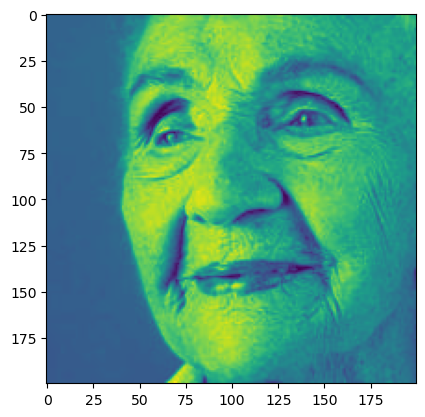

In [70]:
image = cv2.imread('image.jpg')
imgGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray)


In [66]:

# image  = Image.fromarray(image)
# image = transforms.ToTensor()(image)
# image = transforms.Resize((200,200))(image)
# image = transforms.Normalize((0.5,),(0.5,))(image)
# image

In [67]:
print(label[pred(image)])

Non_Minor


In [71]:
cap  = cv2.VideoCapture("Util/sample data.mp4")
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


while True:
    ret, img = cap.read()
    if not ret:
        print("Frame telah habis, Video selesai")
        break

    # Getting corners around the face
    faces = faceCascade.detectMultiScale(img, 1.3, 5)  # 1.3 = scale factor, 5 = minimum neighbor
    for (x, y, w, h) in faces:
        #draw boxes
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        predict = pred_resnet(img[y:y+h, x:x+w])
        if(label[predict]=='Minor'):
            face = img[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(face, (99, 99),30)
            img[y:y+h, x:x+w] = blur
    cv2.imshow("face_detect", img)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


d:\anaconda\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [69]:


# Enable camera
cap = cv2.VideoCapture(0)
cap.set(3, 420)
cap.set(4, 420)
prev_frame = 0
new_frame = 0
# import cascade file for facial recognition
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Getting corners around the face
    faces = faceCascade.detectMultiScale(imgGray, 1.3, 5)  # 1.3 = scale factor, 5 = minimum neighbor
    # drawing bounding box around face
    predict = pred(img)
    font  = cv2.FONT_HERSHEY_COMPLEX
    new_frame = time.time()
    fps = str(int(1/(new_frame - prev_frame)))
    prev_frame = new_frame
    cv2.putText(img, fps, (10, 70), font, 3, (0, 255, 0), 3, cv2.LINE_AA)
    for (x, y, w, h) in faces:
        predict = pred(img[y:y+h, x:x+w])
        if(label[predict]=='Minor'):
            face = img[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(face, (99, 99),30)
            img[y:y+h, x:x+w] = blur




    cv2.imshow('face_detect', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyWindow('face_detect')

In [85]:
!YOLO.py